In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import gpxpy

import shapely
import contextily as cx
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
LESloop_effort_df = pd.read_csv("../data/LESloop_effort_gdf.csv")

LESloop_effort_gdf = gpd.GeoDataFrame(LESloop_effort_df, geometry=gpd.points_from_xy(LESloop_effort_df.longitude, LESloop_effort_df.latitude))

In [3]:
LESloop_effort_gdf

,Unnamed: 0,Unnamed: 0.1,latitude,longitude,elevation,time,heart_rate,cadence,geometry,effort_zone
0,0,0,40.688497,-73.970898,25.5,2022-03-03 11:58:46+00:00,103,83,POINT (-73.97090 40.68850),1
1,1,1,40.688514,-73.970898,25.4,2022-03-03 11:58:51+00:00,99,0,POINT (-73.97090 40.68851),1
2,2,2,40.688518,-73.970909,25.4,2022-03-03 11:58:52+00:00,99,0,POINT (-73.97091 40.68852),1
3,3,3,40.688531,-73.970922,25.4,2022-03-03 11:58:53+00:00,100,0,POINT (-73.97092 40.68853),1
4,4,4,40.688545,-73.970934,25.4,2022-03-03 11:58:54+00:00,101,0,POINT (-73.97093 40.68854),1
...,...,...,...,...,...,...,...,...,...,...
3605,3605,3605,40.688159,-73.970896,26.2,2022-03-03 12:59:14+00:00,168,86,POINT (-73.97090 40.68816),3
3606,3606,3606,40.688134,-73.970880,26.3,2022-03-03 12:59:15+00:00,168,86,POINT (-73.97088 40.68813),3
3607,3607,3607,40.688112,-73.970860,26.3,2022-03-03 12:59:16+00:00,167,85,POINT (-73.97086 40.68811),3
3608,3608,3608,40.688089,-73.970846,26.4,2022-03-03 12:59:17+00:00,167,85,POINT (-73.97085 40.68809),3


I want to plot the LES Loop data, and indicate the easy parts as well as the hard parts.

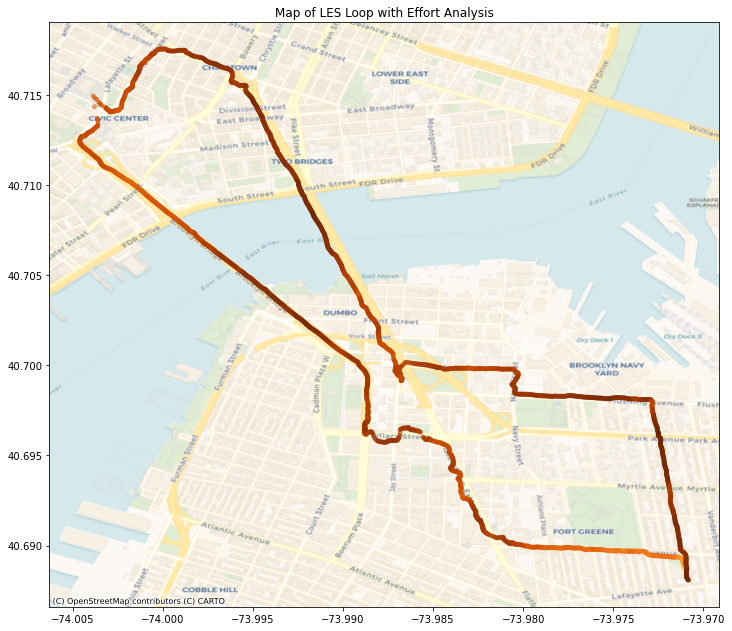

In [4]:
#first map made without engineered column
fig, ax = plt.subplots(figsize=(12,12))

ax=LESloop_effort_gdf.plot(ax=ax, alpha=0.5, markersize=15, cmap='YlOrBr', column='heart_rate');

basemap=cx.providers.CartoDB.Voyager

cx.add_basemap(ax, crs=4326, source=basemap)

plt.title("Map of LES Loop with Effort Analysis");

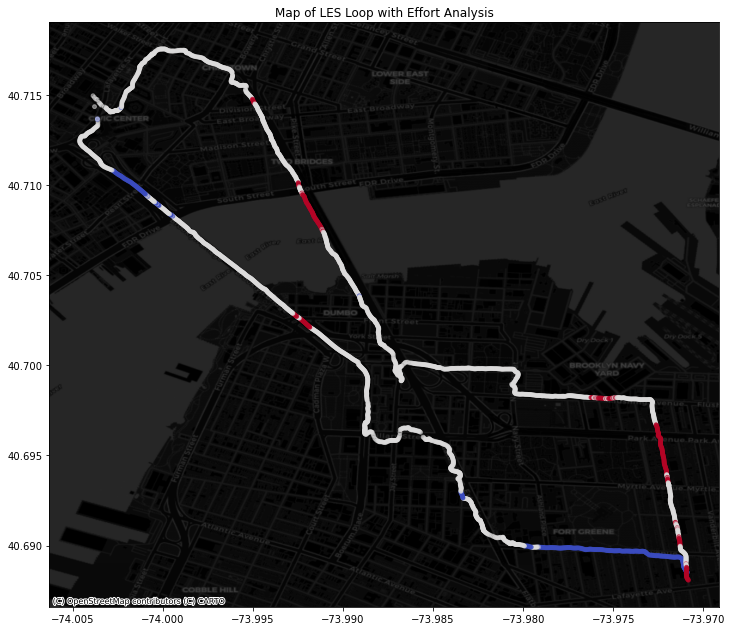

In [5]:
#second map made using engineered feature to clearly differentiate the easy parts from the hard parts
fig, ax = plt.subplots(figsize=(12,12))

ax=LESloop_effort_gdf.plot(ax=ax, alpha=0.5, markersize=15, cmap='coolwarm', column='effort_zone');

basemap=cx.providers.CartoDB.DarkMatter

cx.add_basemap(ax, crs=4326, source=basemap)

plt.title("Map of LES Loop with Effort Analysis");